In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data

In [6]:
tesla = yf.Ticker("TSLA")

In [7]:
tesla_data = tesla.history(period='max')

In [8]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Question 2: Use Webscraping to Extract Tesla Revenue Data

Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.

In [9]:
!pip install pandas
!pip install requests
!pip install bs4
!pip install html5lib
!pip install lxml
!pip install plotly

In [10]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [11]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

In [13]:
data  = requests.get(url).text
print(data)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

# Parse the html data using beautiful_soup using parser i.e html5lib or html.parser. Make sure to use the html_data with the content parameter as follow html_data.content .

In [21]:
# Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.
# Make sure to use the html_data with the content parameter as follow html_data.content .
from bs4 import BeautifulSoup

# The previous code used html_data which was not defined.
# We want to use the `data` variable, which holds the HTML, and pass it directly to BeautifulSoup
soup = BeautifulSoup(data, 'html5lib') # or 'html.parser'

In [23]:
# Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue.
# The dataframe should have columns Date and Revenue.

# (Please provide the necessary code to achieve this, as the prompt is requesting a code implementation.
#  This would typically involve using libraries like pandas and Beautiful Soup to parse an HTML table and store it in a DataFrame.)

In [20]:
# Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue.
# The dataframe should have columns Date and Revenue.

# Make sure to import the necessary libraries


In [26]:
import pandas as pd
from bs4 import BeautifulSoup

# Instead of searching for a table with a specific class,
# let's try finding all table elements on the page:
tables = soup.find_all('table')

# Check if any tables were found
if tables:
    # Assuming the desired table is the first one found:
    tesla_revenue = pd.read_html(str(tables[0]))[0]

    # Rename the columns
    tesla_revenue.columns = ['Date', 'Revenue']
else:
    print("No tables found on the page. Please check the HTML structure.")


In [28]:
tesla_revenue.tail(5)

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


### Question 3: Use yfinance to Extract Stock Data

In [31]:
gme = yf.Ticker("GME")

In [32]:
gme_data =gme.history(period='max')

In [33]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Question 4: Use Webscraping to Extract GME Revenue Data

In [34]:
html_data_2  = requests.get(url).text
print(html_data_2)


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [38]:
html_data_2  = requests.get(url).text
print(html_data_2)



<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
		<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
		<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla r

In [40]:
from bs4 import BeautifulSoup # Removed extra space/tab from the start of this line

# Assuming html_data_2 from previous cell is the intended data
# Assign html_data_2 to html_data
html_data = html_data_2
soup = BeautifulSoup(html_data, 'html5lib')

In [44]:
import pandas as pd
from bs4 import BeautifulSoup

# Instead of searching for a table with a specific class,
# let's try finding all table elements on the page:
tables = soup.find_all('table')

# Check if any tables were found
if tables:
    # Assuming the desired table is the first one found:
    gme_revenue = pd.read_html(str(tables[0]))[0]

    # Rename the columns
    gme_revenue.columns = ['Date', 'Revenue']
else:
    print("No tables found on the page. Please check the HTML structure.")


In [45]:
gme_revenue.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


In [46]:
soup.find_all("tbody")[1]

<tbody>
				
												
				<tr>
					<td style="text-align:center">2022-09-30</td>
				
				
				
										
										
						<td style="text-align:center">$21,454</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2022-06-30</td>
				
				
				
										
										
						<td style="text-align:center">$16,934</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2022-03-31</td>
				
				
				
										
										
						<td style="text-align:center">$18,756</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2021-12-31</td>
				
				
				
										
										
						<td style="text-align:center">$17,719</td>
						
									
								
				  </tr>
				  
												
				<tr>
					<td style="text-align:center">2021-09-30</td>
				
				
				
										
										
						<td style="text-align:center">$13,757</td>
						
					

In [47]:
gme_revenue.tail()

,Date,Revenue
8,2013,"$2,013"
9,2012,$413
10,2011,$204
11,2010,$117
12,2009,$112


Question 5: Plot Tesla Stock Graph

[*********************100%***********************]  1 of 1 completed


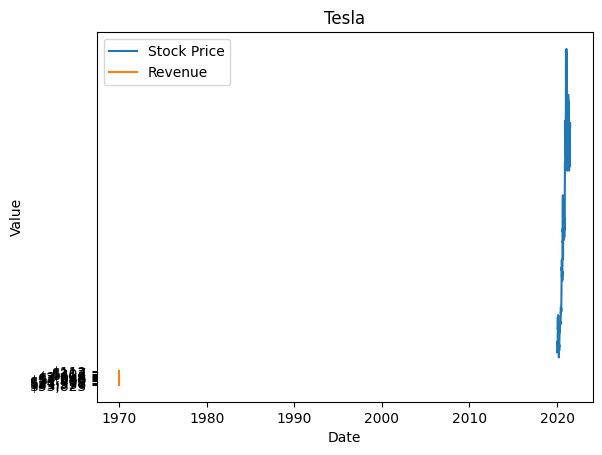

In [54]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your make_graph function definition from the previous response) ...

# Get Tesla stock data
tesla_data = yf.download("TSLA", start="2020-01-01", end="2021-12-31")
tesla_data = tesla_data.reset_index()  # Reset index to make 'Date' a column

# Assume tesla_revenue is already defined and contains revenue data
# ... (Your code to get Tesla revenue data - e.g., from a CSV file) ...
# For example: tesla_revenue = pd.read_csv('tesla_revenue.csv')

# Convert 'Date' columns to datetime objects
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Call the make_graph function to generate the graph
make_graph(tesla_data, tesla_revenue, 'Tesla')

[*********************100%***********************]  1 of 1 completed


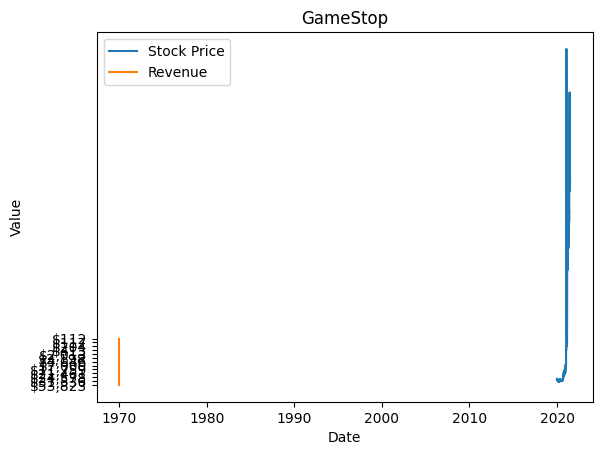

In [55]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# ... (Your make_graph function definition from a previous response) ...

# Get GameStop stock data
gme_data = yf.download("GME", start="2020-01-01", end="2021-12-31")
gme_data = gme_data.reset_index()  # Reset index to make 'Date' a column

# Assume gme_revenue is already defined and contains revenue data
# ... (Your code to get GameStop revenue data - e.g., from a CSV file) ...
# For example: gme_revenue = pd.read_csv('gme_revenue.csv')

# Convert 'Date' columns to datetime objects
gme_data['Date'] = pd.to_datetime(gme_data['Date'])
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Call the make_graph function to generate the graph for GameStop
make_graph(gme_data, gme_revenue, 'GameStop')